In [1]:
#import the csv files into pandas dataframes
import pandas as pd
white_df = pd.read_csv(r'C:\Users\nickl\Downloads\White.csv')
red_df = pd.read_csv(r'C:\Users\nickl\Downloads\Red.csv')
rose_df = pd.read_csv(r'C:\Users\nickl\Downloads\Rose.csv')
sparkling_df = pd.read_csv(r'C:\Users\nickl\Downloads\Sparkling.csv')

# dropping the region column because we won't need it for our analysis
white_df = white_df.drop(['Region'], axis=1)
red_df = red_df.drop(['Region'], axis=1)
rose_df = rose_df.drop(['Region'], axis=1)
sparkling_df = sparkling_df.drop(['Region'], axis=1)
print(white_df.head())

                      Name  Country                   Winery  Rating  \
0          Vermentino 2017    Italy      Famiglia Castellani     3.8   
1        Ronco Broilo 2010    Italy  Conte d'Attimis Maniago     4.3   
2  Weisser Schiefer s 2017  Austria     Weinbau Uwe Schiefer     4.2   
3          Chardonnay 2018  Germany        Krämer - Straight     3.9   
4     Maganza Zibibbo 2018    Italy                Luna Gaia     3.9   

   NumberOfRatings  Price  Year  
0               25   5.65  2017  
1               25  44.90  2010  
2               25  33.25  2017  
3               25   8.99  2018  
4               25   8.60  2018  


In [2]:
# adding a type column so that we can separate by white, red, rose and sparkling after i concatinate the dataframes
white_df['Type'] = 'White'
red_df['Type'] = 'Red'
rose_df['Type'] = 'Rose'
sparkling_df['Type'] = 'Sparkling'
print(white_df.head())
# I concatinate the dataframes so we can work off of a single dataframe for our analysis
all_df = pd.concat([white_df, red_df, rose_df, sparkling_df], axis=0)
print(all_df.head())
all_df

                      Name  Country                   Winery  Rating  \
0          Vermentino 2017    Italy      Famiglia Castellani     3.8   
1        Ronco Broilo 2010    Italy  Conte d'Attimis Maniago     4.3   
2  Weisser Schiefer s 2017  Austria     Weinbau Uwe Schiefer     4.2   
3          Chardonnay 2018  Germany        Krämer - Straight     3.9   
4     Maganza Zibibbo 2018    Italy                Luna Gaia     3.9   

   NumberOfRatings  Price  Year   Type  
0               25   5.65  2017  White  
1               25  44.90  2010  White  
2               25  33.25  2017  White  
3               25   8.99  2018  White  
4               25   8.60  2018  White  
                      Name  Country                   Winery  Rating  \
0          Vermentino 2017    Italy      Famiglia Castellani     3.8   
1        Ronco Broilo 2010    Italy  Conte d'Attimis Maniago     4.3   
2  Weisser Schiefer s 2017  Austria     Weinbau Uwe Schiefer     4.2   
3          Chardonnay 2018  Germa

,Name,Country,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Vermentino 2017,Italy,Famiglia Castellani,3.8,25,5.65,2017,White
1,Ronco Broilo 2010,Italy,Conte d'Attimis Maniago,4.3,25,44.90,2010,White
2,Weisser Schiefer s 2017,Austria,Weinbau Uwe Schiefer,4.2,25,33.25,2017,White
3,Chardonnay 2018,Germany,Krämer - Straight,3.9,25,8.99,2018,White
4,Maganza Zibibbo 2018,Italy,Luna Gaia,3.9,25,8.60,2018,White
...,...,...,...,...,...,...,...,...
1002,Special Cuvée Brut Aÿ Champagne N.V.,France,Bollinger,4.2,37765,46.00,N.V.,Sparkling
1003,Brut Premier Champagne N.V.,France,Louis Roederer,4.2,40004,36.48,N.V.,Sparkling
1004,Impérial Brut Champagne N.V.,France,Moët & Chandon,4.1,76037,40.61,N.V.,Sparkling
1005,Brut (Carte Jaune) Champagne N.V.,France,Veuve Clicquot,4.2,86839,43.60,N.V.,Sparkling


In [3]:
# 1. What country has the most expensive and least expensive wines on average?
# doing simple calculations for the price
price_mean = all_df['Price'].mean()
price_max = all_df['Price'].max()
price_min = all_df['Price'].min()
price_count = all_df['Price'].count()
price_median = all_df['Price'].median() 
price_std = all_df['Price'].std() 
price_var = all_df['Price'].var()  

# grouping by country and ordering the results
country_mean = all_df.groupby(['Country'])['Price'].mean().sort_values(ascending=False)
country_count = all_df.groupby(['Country'])['Price'].count().sort_values(ascending=False)



# print our calculations from above
print ('Mean Price: ' + str(price_mean))
print ('Max Price: ' + str(price_max))
print ('Min Price: ' + str(price_min))
print ('Count of Price: ' + str(price_count))
print ('Median Price: ' + str(price_median))
print ('Std of Price: ' + str(price_std))
print ('Var of Price: ' + str(price_var))

# print groupby results in descending order
print ('Mean Price, grouped by Country: ' + str(country_mean))
print ('Count of Price values, grouped by Country: ' + str(country_count))

#the UK has the most expensive wine on average and Mexico has the cheapest wine on average. However if we only look at countries with more than 100 wines then France has the highest average price and Portugal has the cheapest wines on average with a price of $55.54 and $17.75 respectively. 

Mean Price: 33.02485036865844
Max Price: 3410.79
Min Price: 3.15
Count of Price: 13834
Median Price: 15.95
Std of Price: 70.89989257163683
Var of Price: 5026.794766669644
Mean Price, grouped by Country: Country
United Kingdom    57.770000
France            55.539331
United States     43.719170
Lebanon           36.887500
Australia         36.781132
Italy             29.264825
Switzerland       28.949130
China             27.276667
Czech Republic    25.400000
Moldova           24.027500
Spain             22.479850
Croatia           21.966667
Germany           21.907990
Argentina         20.918669
New Zealand       20.660970
Austria           20.405610
Slovakia          19.900000
Georgia           19.613077
Luxembourg        19.202143
Chile             19.136937
South Africa      18.261939
Portugal          17.751786
Brazil            17.399800
Turkey            15.960000
Israel            15.835217
Greece            15.640800
Canada            14.933333
Uruguay           14.492000
Hunga

<AxesSubplot:xlabel='Country'>

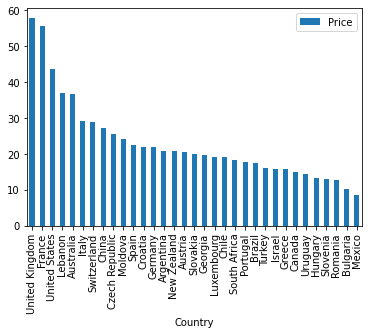

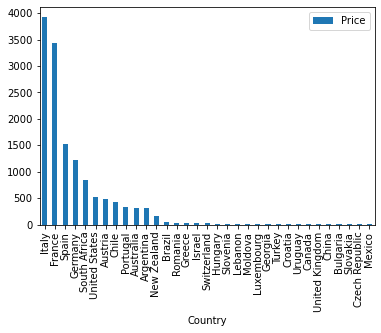

In [4]:
# now I will create some visualizations of our findings with matplotlib
import matplotlib.pyplot as plt
import numpy as np
price_mean_df = pd.DataFrame(country_mean)
price_mean_df.plot.bar()
wine_count_df = pd.DataFrame(country_count)
wine_count_df.plot.bar()

In [27]:
# 2. How does country determine rating vs winery?
# doing simple calculations for the rating
rating_mean = all_df['Rating'].mean()
rating_max = all_df['Rating'].max()
rating_min = all_df['Rating'].min()
rating_count = all_df['Rating'].count()
rating_median = all_df['Rating'].median() 
rating_std = all_df['Rating'].std() 
rating_var = all_df['Rating'].var()  

# grouping by country and ordering the results
country_meanr = all_df.groupby(['Country'])['Rating'].mean().sort_values(ascending=False)
country_countr = all_df.groupby(['Country'])['Rating'].count().sort_values(ascending=False)

# grouping by Winery and ordering results
winery_meanr = all_df.groupby(['Winery'])['Rating'].mean().sort_values(ascending=False)
winery_countr = all_df.groupby(['Winery'])['Rating'].count().sort_values(ascending=False)

# print our calculations from above
print ('Mean Rating: ' + str(rating_mean))
print ('Max Rating: ' + str(rating_max))
print ('Min Rating: ' + str(rating_min))
print ('Count of Rating: ' + str(rating_count))
print ('Median Rating: ' + str(rating_median))
print ('Std of Rating: ' + str(rating_std))
print ('Var of Rating: ' + str(rating_var))

# print groupby results in descending order
print ('Mean Rating, grouped by Country: ' + str(country_meanr))
print ('Count of Rating values, grouped by Country: ' + str(country_countr))
print ('Mean Rating, grouped by Winery: ' + str(winery_meanr))
print ('Count of Rating values, grouped by Winery: ' + str(winery_countr))

# Winery is a much better factor at determining rating than country because for each winery we have  a smaller sample size and the average rating varies more by winery than it does by country.

Mean Rating: 3.8656643053346698
Max Rating: 4.9
Min Rating: 2.2
Count of Rating: 13834
Median Rating: 3.9
Std of Rating: 0.29642689437866776
Var of Rating: 0.08786890371098185
Mean Rating, grouped by Country: Country
Moldova           4.175000
Lebanon           4.137500
Croatia           4.083333
Czech Republic    4.050000
United Kingdom    4.033333
Georgia           3.976923
France            3.932829
United States     3.888302
Italy             3.880225
Germany           3.867779
Portugal          3.862202
New Zealand       3.843636
Switzerland       3.826087
Luxembourg        3.821429
Austria           3.815650
Argentina         3.814610
Spain             3.809915
South Africa      3.802246
Bulgaria          3.800000
Australia         3.788050
Uruguay           3.780000
Slovakia          3.750000
Israel            3.747826
Romania           3.735135
Chile             3.723666
Greece            3.684000
Hungary           3.678947
Slovenia          3.661111
Turkey            3.660000


<AxesSubplot:xlabel='Winery'>

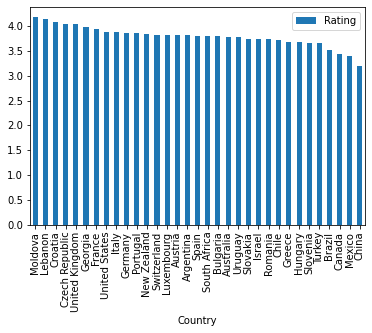

C:\Users\nickl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nickl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nickl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nickl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22622 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nickl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nickl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21313 missing from c

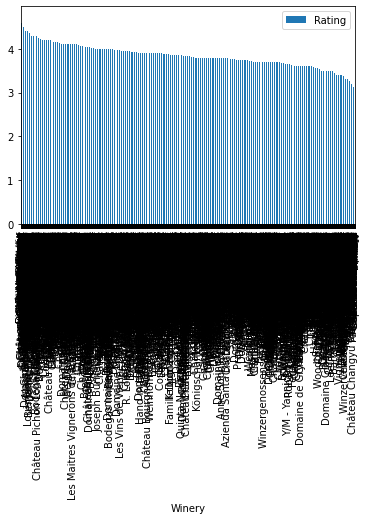

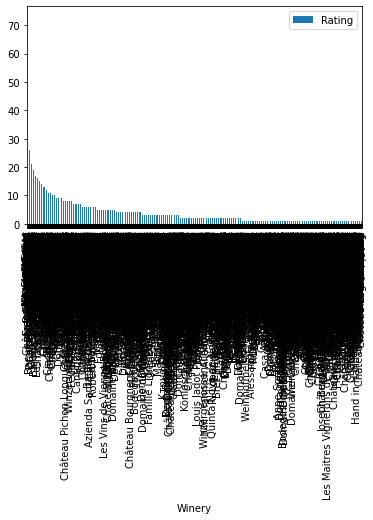

In [6]:
# creating some visualizations of our findings with matplotlib
rating_mean_df = pd.DataFrame(country_meanr)
rating_mean_df.plot.bar()
winery_meanr_df = pd.DataFrame(winery_meanr)
winery_meanr_df.plot.bar()
winery_count_df = pd.DataFrame(winery_countr)
winery_count_df.plot.bar()

In [17]:
# 3. Is year a better predictor of rating than price?
# doing simple calculations for the rating
rating_mean = all_df['Rating'].mean()
rating_max = all_df['Rating'].max()
rating_min = all_df['Rating'].min()
rating_count = all_df['Rating'].count()
rating_median = all_df['Rating'].median() 
rating_std = all_df['Rating'].std() 
rating_var = all_df['Rating'].var()  

# grouping by year and ordering the results
year_meanr = all_df.groupby(['Year'])['Rating'].mean().sort_values(ascending=False)
year_countr = all_df.groupby(['Year'])['Rating'].count().sort_values(ascending=False)

# grouping by price and ordering results
price_meanr = all_df.groupby(['Price'])['Rating'].mean().sort_values(ascending=False)
price_countr = all_df.groupby(['Price'])['Rating'].count().sort_values(ascending=False)


# print our calculations from above
print ('Mean Rating: ' + str(rating_mean))
print ('Max Rating: ' + str(rating_max))
print ('Min Rating: ' + str(rating_min))
print ('Count of Rating: ' + str(rating_count))
print ('Median Rating: ' + str(rating_median))
print ('Std of Rating: ' + str(rating_std))
print ('Var of Rating: ' + str(rating_var))

# print groupby results in descending order
print ('Mean Rating, grouped by Year: ' + str(year_meanr))
print ('Count of Rating values, grouped by Year: ' + str(year_countr))
print ('Mean Rating, grouped by Price: ' + str(price_meanr))
print ('Count of Rating values, grouped by Price: ' + str(price_countr))

Mean Rating: 3.8656643053346698
Max Rating: 4.9
Min Rating: 2.2
Count of Rating: 13834
Median Rating: 3.9
Std of Rating: 0.29642689437866776
Var of Rating: 0.08786890371098185
Mean Rating, grouped by Year: Year
1989    4.550000
2002    4.418182
1990    4.400000
1991    4.400000
1993    4.400000
1997    4.328571
1992    4.300000
1988    4.300000
1999    4.263158
2000    4.252632
2006    4.231250
2004    4.214706
1998    4.214286
2003    4.200000
1995    4.175000
1996    4.166667
2005    4.143125
2007    4.130000
2001    4.116667
2008    4.114851
2009    4.109091
2010    4.089062
2011    4.017308
2012    4.008983
2013    3.982853
2015    3.934267
2014    3.915138
2020    3.900000
2016    3.885092
1961    3.866667
N.V.    3.809140
2017    3.808706
2019    3.777940
2018    3.733823
Name: Rating, dtype: float64
Count of Rating values, grouped by Year: Year
2018    2723
2017    2412
2016    2294
2015    1678
2014     905
2019     893
N.V.     744
2013     624
2012     423
2011     312
2010  

In [22]:
print('price std is: ',price_meanr.std())
print('year std is: ',year_meanr.std())

#price has a higher standard deviation and varies more than the years also has a larger range so the price will tell us more than the year will when determining ratings.

price std is:  0.2938352246443637
year std is:  0.20921150574408212


<AxesSubplot:xlabel='Year'>

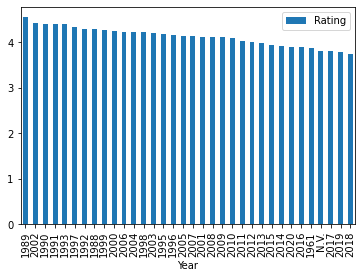

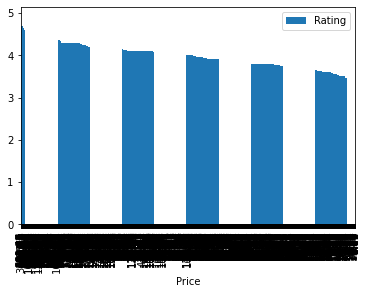

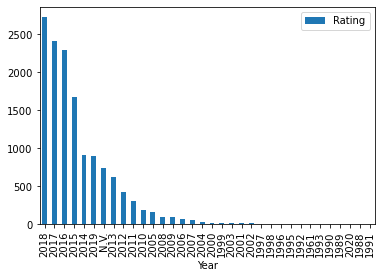

In [18]:
# creating some visualizations of our findings with matplotlib
year_mean_df = pd.DataFrame(year_meanr)
year_mean_df.plot.bar()
price_meanr_df = pd.DataFrame(price_meanr)
price_meanr_df.plot.bar()
year_count_df = pd.DataFrame(year_countr)
year_count_df.plot.bar()

In [ ]:
# 4 Are more recent or older wines getting better ratings? Are the higher rated wines priced higher?
# We cannot see definitively that the older wines are getting better ratings, on average the older wines have a better rating but it shows us that certain years have better ratings than others, notably 2002 and 1997 had better years than you would expect if we say that older wines are better.
# We can see that the higher priced wines are rated better and the ratings decline with price so yes the higher rated wines are priced higher.


In [11]:
# gaining access to twitter API
import tweepy

#twitter access variables
ACCESS_TOKEN = '216434773-zECNt9OauGhlLgbblrOW9BSyZU93wyYcVmOGQLco'
ACCESS_SECRET = 'JAuligSC32V1nYFIxvwRoWmrTQ4EAH2p9BC7AuRt2Jwv6'
CONSUMER_KEY = 'kTMcWcXGaZvxMST9WgCKNypbJ'
CONSUMER_SECRET = 'il7kDWQxjrZThwKBq80MtL77cjtLswa4Cn7nqsa3UuopfxkL0W'

#setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth,wait_on_rate_limit=True)
    return api

#creating api object
api = connect_to_twitter_OAuth()

In [10]:
# here are the recent tweets from the official vivino account on twitter  mostly apologizing to customers due to order mistakes
vivino_tweets = api.user_timeline('vivino')
for tweet in vivino_tweets:
    print(tweet.text)

@b_vanderbrook Hi @b_vanderbrook, so sorry to hear of the issue you're facing with Wine Adventure. Your feedback is… https://t.co/cG1RzP6PiC
@thebeaglerunner Hi Melanie, we are so sorry to hear this. Would you be able to give us more information in DM so w… https://t.co/1LgqDrHcZZ
@thegraycat Hi @thegraycat 

Thanks for bringing this to our attention. We're sorry to hear that you were not able… https://t.co/VAngiR9umR
It’s not too late to celebrate rosé season with @PostMalone's highly rated @maison9wine, which debuted its 2020 vin… https://t.co/LKnR24SVWx
@heytrooblue Hi Joe, 

Thanks for bringing this to our attention. We're sorry to hear about the issue in accessing… https://t.co/pEyfHw02S4
@axelvnk Hi Axel. I'm sorry that you had issues when trying to use our code. We would love to help, but we'll need… https://t.co/viqD5VBILl
@andywatson66 Hi Andrew. I'm sorry that you are facing issues with your delivery. I can see that one of our Custome… https://t.co/WQ93dwdrbS
@Fabi1611 Hi @Fa

In [16]:
import csv

##### Vivino
# Open/Create a file to append data
csvFile = open('vivino.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#Vivino",count=1000,
                           lang="en").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    
# I have learned that the twitter API only lets me pull the tweets from the last 2 weeks and there has onyl been one tweet 
# with the hashtag #Vivino in that timeframe and we can see that here:


2021-09-10 22:33:37 Looking back at last weekend's pairings, thanks to Al at @corkandbrew. I'll be posting my notes up to #Vivino later… https://t.co/YvUm765BnW
